### reference : https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002556179

In [3]:
from torch import nn

In [4]:
class encoder(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(encoder, self).__init__()
        self.mpconv = nn.Sequential( 
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, 2))
    def forward(self, x):
        x = self.mpconv(x)
        return x

In [5]:
class decoder(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(decoder, self).__init__()
        self.mpconv = nn.Sequential( 
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2))
    def forward(self, x):
        x = self.mpconv(x)
        return x

In [6]:
class CDAE(nn.Module):
    def __init__(self):
        super(CDAE, self).__init__()
        ## encoder layers ##
        self.enc1 = encoder(1,16)
        self.enc2 = encoder(16,32)
        self.enc3 = nn.Conv2d(32, 64, 3, padding=1)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.deconv1 = decoder(64, 32)
        self.deconv2 = decoder(32, 16)
        self.deconv3 = nn.Conv2d(16, 1, 3, padding=1)
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = self.enc1(x)
        x1 = self.enc2(x)
        x2 = self.enc3(x1)
        x3 = self.deconv1(x2)
        x4 = self.deconv2(x3)
        x5 = self.deconv3(x4)
        x6 = self.out(x5)
        return x6

In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net_CDAE.parameters(), lr=lr)

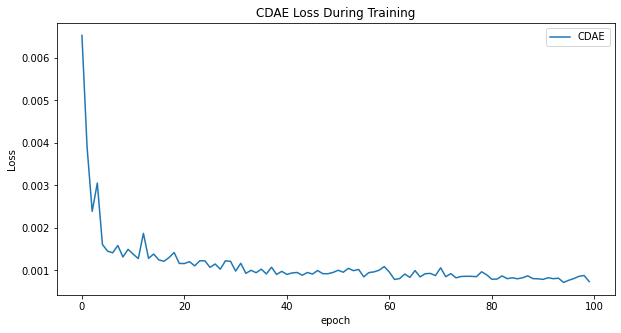

In [28]:
plt.figure(figsize=(10,5))
plt.title("CDAE Loss During Training")
plt.plot(losses,label="CDAE")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

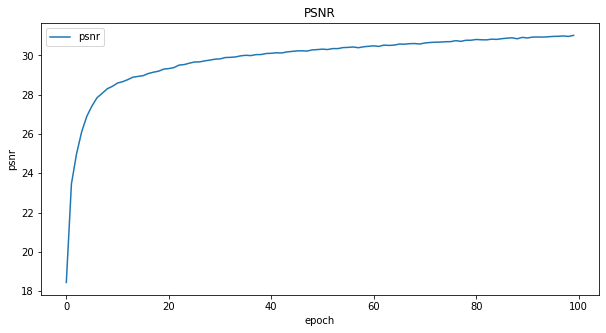

In [29]:
plt.figure(figsize=(10,5))
plt.title("PSNR")
plt.plot(p,label="psnr")
plt.xlabel("epoch")
plt.ylabel("psnr")
plt.legend()
plt.show()

(-0.5, 127.5, 127.5, -0.5)

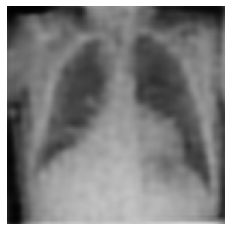

In [31]:
plt.imshow(np.transpose(utils.make_grid(f[0][7]).cpu(),(1,2,0)))
plt.axis('off')

### psnr

In [ ]:
res_psnr = []
for i in range(len(r)):
    for j in range(22):
        result.append(PSNR(r[i][j], f[i][j]))

In [37]:
np.mean(result)

31.265858231432023

### SSIM

In [43]:
from skimage.metrics import structural_similarity as ssim
res_ssim = []
for i in range(len(r)):
    # 마지막에 들어가는 batch_size 크기만큼 반복
    for j in range(22):
        c = r[i][j].squeeze()
        d =  f[i][j].squeeze()
        score = ssim(np.array(c), np.array(d))
        res_ssim.append(score)

In [46]:
np.mean(res_ssim)

0.9317006776958872

### MAE

In [42]:
mae_loss = nn.L1Loss()
res_mae = []
for i in range(len(r)):
    for j in range(22):
        res_mae.append(mae_loss(r[i][j], f[i][j]))
    
np.mean(res_mae)

MAE


0.020113828